## San Francisco: From (2020) Census Tracts to Neighborhoods
### Team Code & Cry


In order to more effectively analyze and compare our data and findings, much of which was collected at the census tract level, we have decided to work at the neighborhood level. We believe that the neighborhood level is a significantly more accessible scale for storytelling and visualizations. In order to establish a share definition and list of neighborhoods, we used the [Analysis Neighborhoods data set](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods-2020-census-tracts-assigned/sevw-6tgi) from DataSF to group all census tracts into assigned neighborhoods. These neighborhood boundaries and their respective census tracts were determined by the Department of Public Health and the Mayor's Office of Housing & Community Development, with support from the Planning Department. 

This data set included 42 neighborhoods comprised of 2020 census tracts, using common real estate and residents’ definitions for the purpose of providing consistency in the analysis and reporting of socio-economic, demographic, and environmental data. Note that these so-called 'analysis neighborhoods' are not codified in Planning Code nor Administrative Code, but they provide a consistent and shared definition of neighborhood boundaries throughout the entirety of our project - especially since all covid data is based on 2020 census tracts. Let's check it out!

### Understanding Neighborhood Boundaries### Analysis Neighborhoods

In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [12]:
#pull in the Analysis Neighborhoods data set from DataSF
ct = gpd.read_file('data/SF2020_Neighborhoods_CTs.geojson')

In [13]:
ct.shape

(242, 12)

Looks like their are 242 census tracts in this file, all of which are assigned to one of the 41 neighborhoods. Let's dig a bit deeper and see what the data looks like: 

In [14]:
ct.head()

,name,neighborhoods_analysis_boundaries,tractce,sup_dist_2022,data_loaded_at,county_fp,state_fp,sup_dist_2012,data_as_of,object_id,geoid,geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
3,9804.01,The Farallones,980401,4,2022-07-08 14:12:00,075,06,1,2022-07-08 21:09:48.141,239,06075980401,"MULTIPOLYGON (((-123.00360 37.69325, -123.0040..."
4,612,Bayview Hunters Point,061200,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,226,06075061200,"MULTIPOLYGON (((-122.38528 37.74024, -122.3858..."


In [15]:
#quick stats on the neighborhood column
ct['neighborhoods_analysis_boundaries'].describe()

count         242
unique         42
top       Mission
freq           17
Name: neighborhoods_analysis_boundaries, dtype: object

Great, this is the exact data we need in order to merge other datasets and assign census tracts to larger neighborhoods. Let's clean this data set up a bit though, by renaming some columns: 

In [16]:
#dropping the Farrallones census tract because it has messed with our maps in the past
ct = ct.drop(labels=3, axis=0)

In [17]:
ct.head()

,name,neighborhoods_analysis_boundaries,tractce,sup_dist_2022,data_loaded_at,county_fp,state_fp,sup_dist_2012,data_as_of,object_id,geoid,geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
4,612,Bayview Hunters Point,061200,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,226,06075061200,"MULTIPOLYGON (((-122.38528 37.74024, -122.3858..."
5,611.02,Chinatown,061102,3,2022-07-08 14:12:00,075,06,3,2022-07-08 21:09:48.141,225,06075061102,"MULTIPOLYGON (((-122.40631 37.79426, -122.4068..."


In [19]:
ct['neighborhoods_analysis_boundaries'].describe()

count         241
unique         41
top       Mission
freq           17
Name: neighborhoods_analysis_boundaries, dtype: object

In [21]:
#renaming the columns
ct.columns = ['Name',
              'Neighborhood', 
              'Census Tract',
              'Supervisor District 2022',
              'Data Loaded',
              'County Code',
              'State Code',
              'Supervisor District 2012',
              'Data as of',
              'Object ID',
              'FIPS',
              'Geometry',]

In [22]:
#checking that the above function worked
ct.head()

,Name,Neighborhood,Census Tract,Supervisor District 2022,Data Loaded,County Code,State Code,Supervisor District 2012,Data as of,Object ID,FIPS,Geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
4,612,Bayview Hunters Point,061200,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,226,06075061200,"MULTIPOLYGON (((-122.38528 37.74024, -122.3858..."
5,611.02,Chinatown,061102,3,2022-07-08 14:12:00,075,06,3,2022-07-08 21:09:48.141,225,06075061102,"MULTIPOLYGON (((-122.40631 37.79426, -122.4068..."


Perfect, now that our data is a bit more cleaned up, let's see if we can learn a bit more about the breakdown of how many census tracts are assigned to each of the remaining 41 neighborhoods: 

In [23]:
# getting a count on how many census tracts are in each neighborhood
ct['Neighborhood'].value_counts()

Mission                           17
Sunset/Parkside                   16
Tenderloin                        12
Outer Richmond                    11
Bayview Hunters Point             11
Financial District/South Beach    10
Marina                             9
Nob Hill                           9
Pacific Heights                    9
Excelsior                          8
Castro/Upper Market                7
Western Addition                   7
West of Twin Peaks                 7
South of Market                    7
Russian Hill                       7
Noe Valley                         6
Bernal Heights                     6
Oceanview/Merced/Ingleside         6
Inner Sunset                       6
Chinatown                          6
Haight Ashbury                     5
Hayes Valley                       5
Outer Mission                      5
North Beach                        5
Potrero Hill                       5
Inner Richmond                     5
Visitacion Valley                  5
P

This is really interesting to see, and makes me excited to further visualize and map these neighborhoods. 
Next, we'll need to join this Analysis Neighborhoods data with our spatial data from 2020 census tracts. Then, we can finally begin mapping. 

### Merging Analysis Neighborhoods with Spatial Data

In [25]:
import geopandas as gpd

In [26]:
# bring in the geojson file with the 2020 census tracts
tracts=gpd.read_file('data/2020CTs.geojson')
# see what the data looks like
tracts.head()

,name,intptlon,awater,mtfcc,aland,namelsad,tractce,statefp,data_loaded_at,intptlat,funcstat,countyfp,data_as_of,geoid,geometry
0,9805.01,-122.4193463,9769.0,G5020,1471536.0,Census Tract 9805.01,980501,06,2022-03-04,+37.7162081,S,075,2021-02-01,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,171.02,-122.4504754,0.0,G5020,294894.0,Census Tract 171.02,017102,06,2022-03-04,+37.7654353,S,075,2021-02-01,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,123.02,-122.4120970,0.0,G5020,92653.0,Census Tract 123.02,012302,06,2022-03-04,+37.7870222,S,075,2021-02-01,06075012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133..."
3,168.01,-122.4290133,0.0,G5020,226534.0,Census Tract 168.01,016801,06,2022-03-04,+37.7713309,S,075,2021-02-01,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,119.02,-122.4098067,0.0,G5020,93053.0,Census Tract 119.02,011902,06,2022-03-04,+37.7909959,S,075,2021-02-01,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


In [27]:
#seeing how many rows and columns we're working with 
tracts.shape

(244, 15)

The analysis neighborhoods data set included 241 census tracts, so this is almost an exact match. 
Still, let's pull a bit more info on this data set before merging: 

In [28]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            244 non-null    object        
 1   intptlon        244 non-null    object        
 2   awater          244 non-null    object        
 3   mtfcc           244 non-null    object        
 4   aland           244 non-null    object        
 5   namelsad        244 non-null    object        
 6   tractce         244 non-null    object        
 7   statefp         244 non-null    object        
 8   data_loaded_at  244 non-null    datetime64[ns]
 9   intptlat        244 non-null    object        
 10  funcstat        244 non-null    object        
 11  countyfp        244 non-null    object        
 12  data_as_of      244 non-null    datetime64[ns]
 13  geoid           244 non-null    object        
 14  geometry        244 non-null    geometry      
dty

Based on this list of columns, we really only need the census tract number (tractce) and geometry columns in order to merge the two data sets. Let's move forward with doing so: 

In [30]:
#defining columns to keep
tracts = tracts[['tractce','geometry']]
tracts.head()

,tractce,geometry
0,980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133..."
3,016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


We have the census tract number, but we need a full FIPS code to merge. We'll add '06' for the state of California and '075' for the county of San Francisco to the census tract number as follows: 

In [31]:
# create a full FIPS code column before merging
tracts['FIPS'] ='06' + '075' + tracts['tractce']

In [32]:
# double check that we have a new and complete FIPS code column
tracts.head()

,tractce,geometry,FIPS
0,980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",06075980501
1,017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",06075017102
2,012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133...",06075012302
3,016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",06075016801
4,011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",06075011902


Perfect, that worked! Now we merge on FIPS as follows: 

In [33]:
# create a new dataframe based on the join, tracts is spatial data so must come first
nhoods=tracts.merge(ct,on="FIPS")

In [23]:
nhoods.head(5)

,tractce,geometry,FIPS,Name,Neighborhood,Census Tract,Supervisor District 2022,Data Loaded,County Code,State Code,Supervisor District 2012,Data as of,Object ID,Geometry
0,980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",06075980501,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
1,017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",06075017102,171.02,Haight Ashbury,017102,8,2022-07-08 14:12:00,075,06,5,2022-07-08 21:09:48.141,84,"MULTIPOLYGON (((-122.44912 37.76165, -122.4505..."
2,012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133...",06075012302,123.02,Tenderloin,012302,3,2022-07-08 14:12:00,075,06,3,2022-07-08 21:09:48.141,32,"MULTIPOLYGON (((-122.40823 37.78736, -122.4098..."
3,016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",06075016801,168.01,Hayes Valley,016801,5,2022-07-08 14:12:00,075,06,5,2022-07-08 21:09:48.141,79,"MULTIPOLYGON (((-122.42493 37.77078, -122.4264..."
4,011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",06075011902,119.02,Nob Hill,011902,3,2022-07-08 14:12:00,075,06,3,2022-07-08 21:09:48.141,24,"MULTIPOLYGON (((-122.40879 37.79016, -122.4104..."


In [34]:
# define the columns to keep, which include: geometry, FIPS and Neighborhood
columns_to_keep = ['geometry',
                   'FIPS',
                   'Neighborhood']

In [35]:
# copy and create a new function, nhoods2, that just displays the defined columns to keep
nhoods2 = nhoods[columns_to_keep].copy()
nhoods2

,geometry,FIPS,Neighborhood
0,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",06075980501,McLaren Park
1,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",06075017102,Haight Ashbury
2,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133...",06075012302,Tenderloin
3,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",06075016801,Hayes Valley
4,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",06075011902,Nob Hill
...,...,...,...
236,"MULTIPOLYGON (((-122.42646 37.76627, -122.4252...",06075020201,Mission
237,"MULTIPOLYGON (((-122.39362 37.78308, -122.3928...",06075061508,Financial District/South Beach
238,"MULTIPOLYGON (((-122.43075 37.79865, -122.4291...",06075013001,Marina
239,"MULTIPOLYGON (((-122.42484 37.80227, -122.4246...",06075010201,Russian Hill


This is exactly what we need in order to start mapping our neighborhoods of census tracts! 

In the next section, we'll experiment with a few different types of static and interactive mapping techniques that will inform how we visualize our data, by neighborhood, throughout all other notebooks in our project.  

### Mapping & Visualizations

<AxesSubplot: >

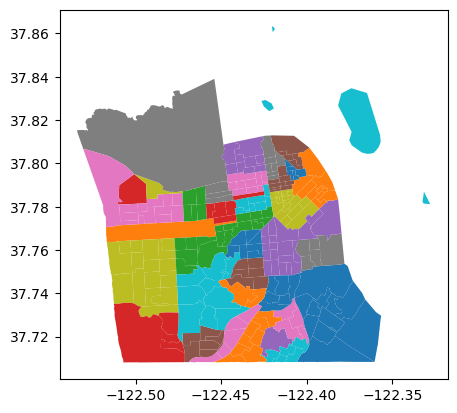

In [37]:
#simple plot map color coded by neighborhood
nhoods.plot(column='Neighborhood')

(-122.54439655, -122.31760845, 37.700309149999995, 37.87095985)

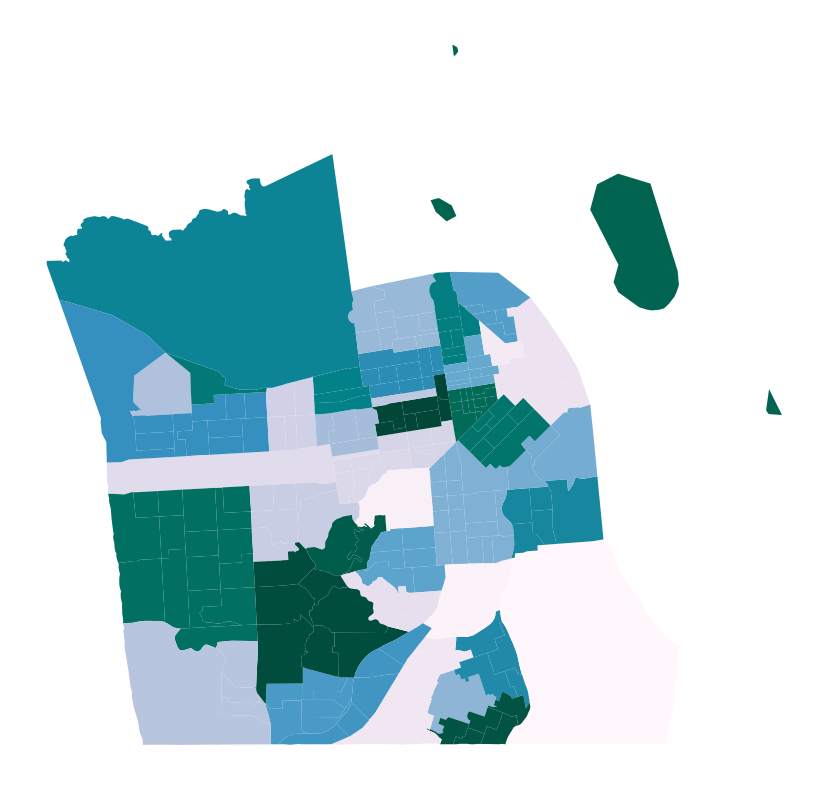

In [38]:
# a slightly more advanced, and visually appealing, map with the axis turned off and a more defined figure size
ax1 = nhoods2.plot(
        column='Neighborhood', 
        figsize=(12,10),
        cmap='PuBuGn',
        )
ax1.axis('off')

In [39]:
# importing 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'San Francisco Neighborhoods by Census Tract (2020)')

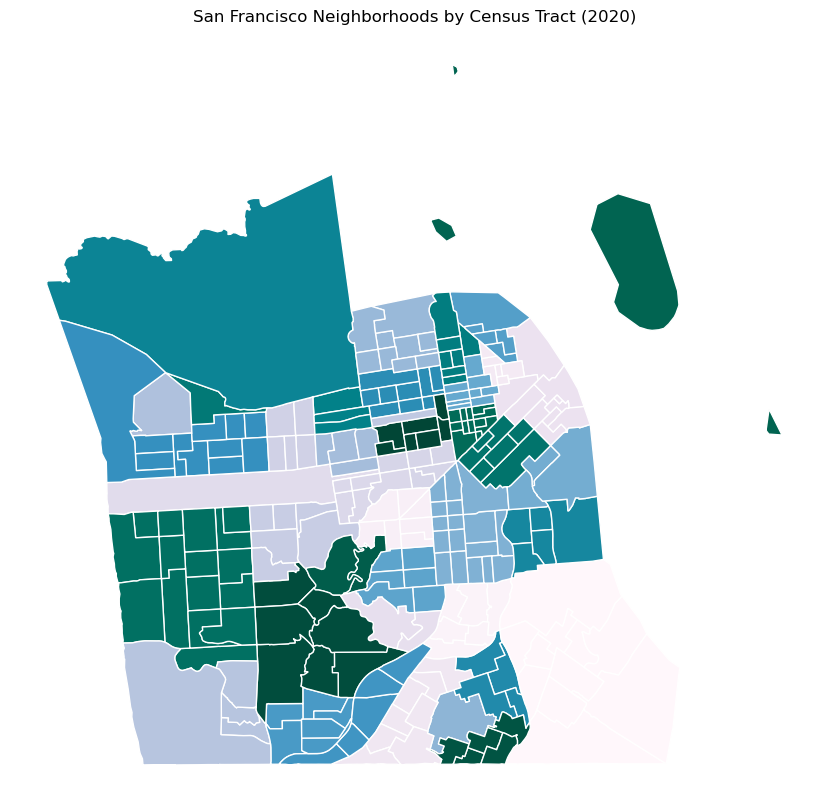

In [40]:
# Making another non-interactive figure with axis turned off and a new title at the top
fig, ax = plt.subplots(figsize = (12,10)) 
nhoods2.plot(column = 'Neighborhood',legend=False,
  edgecolor='white',cmap = 'PuBuGn',ax=ax)
ax.axis('off')
plt.title('San Francisco Neighborhoods by Census Tract (2020)')

In [41]:
# trying out a new interactive map! as you hover over each census tract, a pop-up shows its neighborhood
nhoods2.explore()

In [42]:
# making the interactive map a bit prettier and easier to understand, complete with a legend
nhoods2.explore(
     column="Neighborhood", # make choropleth based on "BoroName" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="PuBuGn", # use "Set1" matplotlib colormap
     style_kwds=dict(color="white") # use black outline
    )